Import des librairies

In [3]:
import pandas as pd
from matplotlib.pyplot import *

import scipy.signal

import numpy

Lecture du fichier

In [4]:
data = pd.read_csv("result_number_accounts_hour.csv", delimiter =',')
data

,time_slots,ASSEofficiel,OL,ClermontFoot,MontpellierHSC,OM_Officiel,ogcnice,AS_Monaco,estac_officiel,girondins,...,StadeDeReims,FCMetz,RCSA,AngersSCO,FCNantes,staderennais,RCLens,losclive,FCLorient,SB29
0,2022-01-30T12:00:00.000Z,45,372,1,27,331,23,60,16,578,...,7,1,10,1,6,15,39,11,14,14
1,2022-01-30T13:00:00.000Z,61,233,1,50,336,31,57,8,349,...,20,1,15,13,8,4,21,26,9,23
2,2022-01-30T14:00:00.000Z,47,338,1,26,283,14,22,4,187,...,6,1,11,16,1,21,8,28,2,14
3,2022-01-30T15:00:00.000Z,58,469,1,35,171,20,34,14,138,...,6,2,40,59,5,13,11,2,28,23
4,2022-01-30T16:00:00.000Z,191,3513,6,40,168,13,36,36,76,...,6,27,30,12,6,10,13,11,30,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2022-03-16T14:00:00.000Z,24,219,1,6,99,7,25,1,53,...,4,11,12,1,22,39,14,130,9,1
1004,2022-03-16T15:00:00.000Z,18,143,0,22,315,15,23,4,91,...,4,2,2,15,8,55,10,126,3,1
1005,2022-03-16T16:00:00.000Z,13,222,2,15,302,20,38,5,38,...,103,7,8,3,10,59,12,111,22,4
1006,2022-03-16T17:00:00.000Z,17,239,2,7,182,10,63,5,79,...,60,3,11,2,10,113,12,669,16,5


Parse la date pour pouvoir l'utiliser par la suite, dans une autre colonne

In [3]:
b = data.iloc[:, 0] #reading from column 0
a = pd.to_datetime(b, format='%Y-%m-%dT%H:%M:%S.%fZ', errors='ignore')
data['time'] = a

Fonction pour afficher le résultat

In [4]:
def plot_df(x, y, xlabel='Date', ylabel='Value', dpi=100):
    figure(figsize=(16,5), dpi=dpi)
    plot(x, y)
    gca().set(xlabel=xlabel, ylabel=ylabel)

Liste des noms des comptes Twitter de chaque club

In [5]:
list_clubs = list(data.columns[1:-1]) 
list_clubs

['ASSEofficiel',
 'OL',
 'ClermontFoot',
 'MontpellierHSC',
 'OM_Officiel',
 'ogcnice',
 'AS_Monaco',
 'estac_officiel',
 'girondins',
 'psg_inside',
 'StadeDeReims',
 'FCMetz',
 'RCSA',
 'AngersSCO',
 'FCNantes',
 'staderennais',
 'RCLens',
 'losclive',
 'FCLorient',
 'SB29']

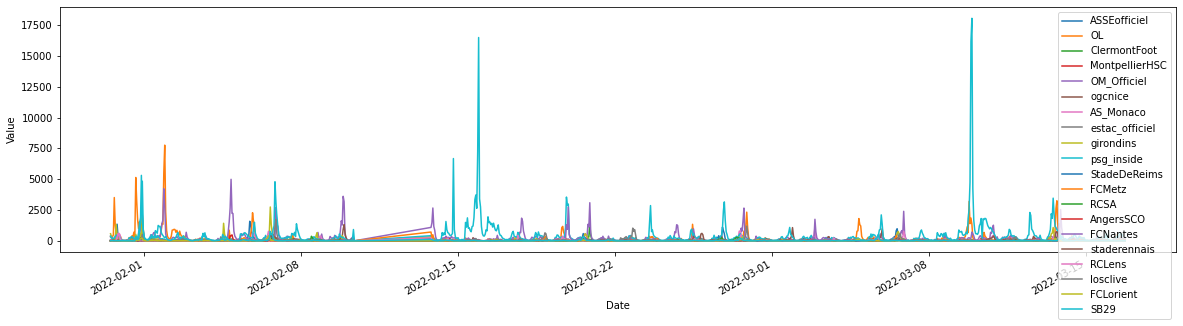

In [6]:
data.plot(x = 'time', y = list_clubs, xlabel='Date', ylabel='Value', figsize=(20,5))
show()

On voit qu'il y a des pics fréquents pour chaque club. (L'anomalie entre le 10 et 13 février est dû au fait que les données n'ont pas pu extraites, il manque les données de ces dates).

On peut également regarder la répartition du nombre de tweets, pour un club donné, et voir que celui-ci suit une semi-gaussienne.

<AxesSubplot:>

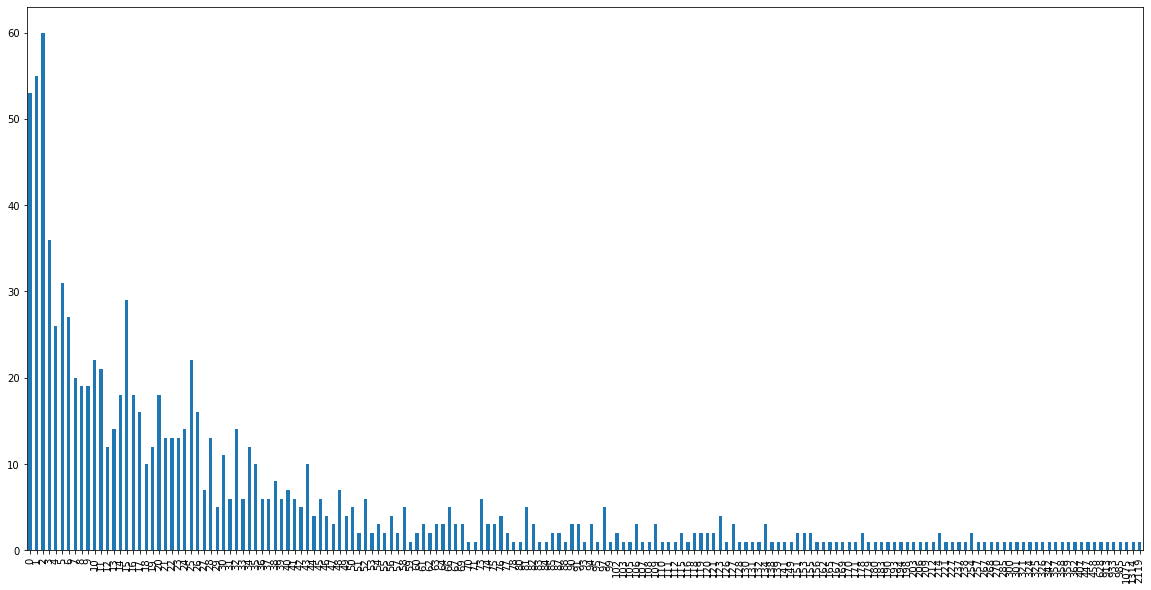

In [5]:
data['ogcnice'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize = (20,10))

Données statistiques pour chaque club

In [7]:
data.describe()

,ASSEofficiel,OL,ClermontFoot,MontpellierHSC,OM_Officiel,ogcnice,AS_Monaco,estac_officiel,girondins,psg_inside,StadeDeReims,FCMetz,RCSA,AngersSCO,FCNantes,staderennais,RCLens,losclive,FCLorient,SB29
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,49.606151,177.155754,12.525794,12.407738,216.475198,45.717262,45.245040,9.865079,69.627976,420.170635,12.737103,19.818452,19.252976,9.570437,33.207341,34.582341,24.534722,48.962302,10.122024,48.589286
std,115.116420,472.474582,57.799995,23.646801,414.308727,114.962290,89.836155,24.469985,160.378919,1100.617103,30.264234,43.826368,36.484390,31.513604,123.067608,69.753952,55.357830,116.838657,28.615139,212.535626
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,26.000000,1.000000,2.000000,53.000000,5.000000,9.000000,1.000000,12.000000,81.000000,1.000000,3.000000,3.000000,0.000000,3.000000,4.000000,3.000000,6.000000,1.000000,2.000000
50%,22.000000,69.000000,3.000000,6.000000,116.000000,18.000000,24.000000,3.000000,31.000000,186.500000,6.000000,9.000000,8.000000,3.000000,10.000000,16.000000,10.000000,19.000000,3.000000,9.000000
75%,50.000000,152.000000,9.000000,14.000000,211.000000,43.000000,46.000000,9.000000,67.000000,381.500000,13.000000,20.000000,20.000000,8.000000,26.000000,36.000000,25.000000,44.000000,9.000000,24.000000
max,1587.000000,7764.000000,1406.000000,301.000000,4991.000000,2119.000000,1067.000000,256.000000,2746.000000,18053.000000,521.000000,715.000000,369.000000,486.000000,2734.000000,750.000000,774.000000,1729.000000,412.000000,5312.000000


Calcul des donnnées statistiques, dont celle de moyenne + écart-type de chaque club

In [8]:
moyenne_per_club = []
third_quartile_per_club = []
mean_plus_sigma = []
mean_plus_two_sigmas = []

for club in list_clubs:
    moyenne = data[club].mean()
    moyenne_per_club.append(moyenne)
    third_quartile_per_club.append(data[club].quantile(0.75))
    mean_plus_sigma.append(moyenne + data[club].std())
    mean_plus_two_sigmas.append(moyenne + 2*data[club].std())

print("moyenne: ",moyenne_per_club)
print("\n3ème quartile: ",third_quartile_per_club)
print("\nm + sigma: ",mean_plus_sigma)
print("\nm + 2*sigma: ",mean_plus_two_sigmas)

moyenne:  [49.60615079365079, 177.15575396825398, 12.52579365079365, 12.407738095238095, 216.4751984126984, 45.717261904761905, 45.245039682539684, 9.865079365079366, 69.62797619047619, 420.17063492063494, 12.737103174603174, 19.81845238095238, 19.25297619047619, 9.570436507936508, 33.20734126984127, 34.58234126984127, 24.53472222222222, 48.96230158730159, 10.12202380952381, 48.589285714285715]

3ème quartile:  [50.0, 152.0, 9.0, 14.0, 211.0, 43.0, 46.0, 9.0, 67.0, 381.5, 13.0, 20.0, 20.0, 8.0, 26.0, 36.0, 25.0, 44.0, 9.0, 24.0]

m + sigma:  [164.72257060892937, 649.6303362794257, 70.32578892062676, 36.054539593436346, 630.7839254878661, 160.67955190797719, 135.08119460957278, 34.33506484663164, 230.00689533860356, 1520.787737551955, 43.00133726840241, 63.644820278872544, 55.73736622318765, 41.08404068565705, 156.2749495678385, 104.3362936209048, 79.89255237485527, 165.80095814325364, 38.737163292288905, 261.12491147795487]

m + 2*sigma:  [279.83899042420796, 1122.1049185905974, 128.12

On associe le résultat à chaque club dans un dictionnaire

In [9]:
dict_moy_per_club = dict(zip(list_clubs, moyenne_per_club))
dict_moy_per_club

{'ASSEofficiel': 49.60615079365079,
 'OL': 177.15575396825398,
 'ClermontFoot': 12.52579365079365,
 'MontpellierHSC': 12.407738095238095,
 'OM_Officiel': 216.4751984126984,
 'ogcnice': 45.717261904761905,
 'AS_Monaco': 45.245039682539684,
 'estac_officiel': 9.865079365079366,
 'girondins': 69.62797619047619,
 'psg_inside': 420.17063492063494,
 'StadeDeReims': 12.737103174603174,
 'FCMetz': 19.81845238095238,
 'RCSA': 19.25297619047619,
 'AngersSCO': 9.570436507936508,
 'FCNantes': 33.20734126984127,
 'staderennais': 34.58234126984127,
 'RCLens': 24.53472222222222,
 'losclive': 48.96230158730159,
 'FCLorient': 10.12202380952381,
 'SB29': 48.589285714285715}

In [10]:
list_clubs

['ASSEofficiel',
 'OL',
 'ClermontFoot',
 'MontpellierHSC',
 'OM_Officiel',
 'ogcnice',
 'AS_Monaco',
 'estac_officiel',
 'girondins',
 'psg_inside',
 'StadeDeReims',
 'FCMetz',
 'RCSA',
 'AngersSCO',
 'FCNantes',
 'staderennais',
 'RCLens',
 'losclive',
 'FCLorient',
 'SB29']

On sélectionne ici les heures à laquelle le nombre de tweets pour une heure est supérieur au seuil que l'on a fixé

In [11]:
def generate_information(list_input_dict, tweets_number,club, range, over_tweets):
    if tweets_number > list_input_dict[club] :
        information = [club, data['time'][range], tweets_number/list_input_dict[club]]
        over_tweets.append(information)
    

def generate_information_seuil(list_input_dict, tweets_number,club,seuil, range, over_tweets):
    if tweets_number > list_input_dict[club]*seuil :
        information = [club, data['time'][range], tweets_number/list_input_dict[club]]
        over_tweets.append(information)

Génère les dictionnaires qui vont associer pour chaque club le type de statistiques

In [12]:
#depending on the argument, will return the threshold of mean * x, 3rd quartile, m + sigma or m + 2*sigma

def generate_over_tweets_seuil(seuil):  #if -3: third quartile;  if -2: m + sigma;    if if -1: m + 2*sigma;    else: mean*x
    over_tweets = []
    for club in list_clubs:
        for i in range(0, data[club].shape[0]):
            tweets_number = data[club][i]
            if seuil == -3:
                dict_third_quartile_per_club = dict(zip(list_clubs, third_quartile_per_club))
                generate_information(dict_third_quartile_per_club, tweets_number,club, i, over_tweets)
                '''
                if tweets_number > dict_third_quartile_per_club[club] :
                    information = [club, data['time'][i], tweets_number/dict_moy_per_club[club]]
                    over_tweets.append(information)
                '''
            elif seuil == -2:
                dict_mean_plus_sigma_per_club = dict(zip(list_clubs, mean_plus_sigma))
                generate_information(dict_mean_plus_sigma_per_club, tweets_number,club, i, over_tweets)
            elif seuil == -1:
                dict_mean_plus_two_sigmas_per_club = dict(zip(list_clubs, mean_plus_two_sigmas))
                generate_information(dict_mean_plus_two_sigmas_per_club, tweets_number,club, i, over_tweets)
            else:
                dict_moy_per_club = dict(zip(list_clubs, moyenne_per_club))
                generate_information_seuil(dict_moy_per_club, tweets_number,club,seuil, i, over_tweets)
    #print(len(over_tweets))
    return over_tweets

In [1]:
generate_over_tweets_seuil(-1)  #exemple pour moyenne + 2 écart-types

NameError: name 'generate_over_tweets_seuil' is not defined

Utilisation d'une nouvelle API qui référence les matchs pour une journée choisie (de 1 à 38), et donne par match les équipes et la date

In [14]:
import http.client
import json
import pandas
import numpy

from datetime import *

def get_matches(journee):
  #journee = 25
  connection = http.client.HTTPConnection('api.football-data.org')
  headers = { 'X-Auth-Token': 'd244615bf85e4354860c825eee0b4c12' }
  connection.request('GET', '/v2/competitions/FL1/matches?matchday='+str(journee), None, headers)
  response = json.loads(connection.getresponse().read().decode())

  Match=[]

  for k in range(len(response["matches"])):
    date=response['matches'][k]['utcDate']
    year=int(date[:4])
    month=int(date[5:7])
    day=int(date[8:10])
    hour=int(date[11:13])+1
    minute=int(date[14:16])
    d1=response['matches'][k]['homeTeam']['name']
    e1=response['matches'][k]['awayTeam']['name']
    Match.append([d1,e1,year,month,day,hour,minute])

    #print(response['matches'][k].keys())
  ar = numpy.array(Match)
  df = pandas.DataFrame(ar,columns=['Domicile','Extérieur','Année','Mois','Jour','Heure','Minute'])
  return df


In [15]:
df = get_matches(25)

On veut un dictionnaire qui renvoie pour une équipe donnée le compte Twitter de cette équipe, car pour les matchs nous avons les équipes, donc nous souhaitons récupérer le compte Twitter ensuie

In [17]:
##Matching between name of club and account
clubs = open("list_clubs" + ".txt", 'r', encoding='utf-8')
clubs_accounts = open("list_clubs_compte" + ".txt", 'r', encoding='utf-8')

list_names_clubs = [club.strip()for club in clubs.readlines()]
list_names_clubs_accounts = [club_account.strip() for club_account in clubs_accounts.readlines()]
clubs.close()
clubs_accounts.close()


matching = dict(zip(list_names_clubs, list_names_clubs_accounts))
matching

{'AS Saint-Étienne': 'ASSEofficiel',
 'Olympique Lyonnais': 'OL',
 'Clermont Foot 63': 'ClermontFoot',
 'Montpellier HSC': 'MontpellierHSC',
 'Olympique de Marseille': 'OM_Officiel',
 'OGC Nice': 'ogcnice',
 'AS Monaco FC': 'AS_Monaco',
 'ES Troyes AC': 'estac_officiel',
 'FC Girondins de Bordeaux': 'girondins',
 'Paris Saint-Germain FC': 'psg_inside',
 'Stade de Reims': 'StadeDeReims',
 'FC Metz': 'FCMetz',
 'RC Strasbourg Alsace': 'RCSA',
 'Angers SCO': 'AngersSCO',
 'FC Nantes': 'FCNantes',
 'Stade Rennais FC 1901': 'staderennais',
 'Racing Club de Lens': 'RCLens',
 'Lille OSC': 'losclive',
 'FC Lorient': 'FCLorient',
 'Stade Brestois 29': 'SB29'}

On teste ensuite pour chaque match qui a lieu si nous avons réussi à identifier une forte activité sur Twitter des équipes concernéee, on regarde ainsi la proportion de matchs identifiés.

In [18]:
from datetime import *

def matches_check(seuil):
    ##Check if for matches there is more tweets
    success = []
    over_tweets = generate_over_tweets_seuil(seuil)
    for i in range (0, df.shape[0]):
        date = datetime(int(df.loc[i][2]), int(df.loc[i][3]), int(df.loc[i][4]), int(df.loc[i][5]))
        date_transfo = datetime.strftime(date, "%Y-%m-%d %H:%M:%S")
        j = 0
        team_1_found = False
        team_2_found = False
        while j < len(over_tweets) and not (team_1_found and team_2_found):
        #for element in over_tweets:
            if (not team_1_found and over_tweets[j][0] == matching[df.loc[i][0]] and str(over_tweets[j][1])[0:10] == date_transfo[0:10]):    #if the tweet concerns the club which plays at domicile and the day corresponds
                success.append(1)
                team_1_found = True
            else:
                success.append(0)
        #for element in over_tweets:
            if (not team_2_found and over_tweets[j][0] == matching[df.loc[i][1]] and str(over_tweets[j][1])[0:10] == date_transfo[0:10]):    #if the tweet concerns the club which plays at domicile and the day corresponds
                success.append(1)
                team_2_found = True

            else:
                success.append(0)
            j += 1

    print("Seuil : " + str(seuil) + ",    Matchs repérés : " + str(sum(success)) + ",     Correspondance : " + str(sum(success)/df.shape[0]*50) + "% des matchs")


On vérifie l'identification des matchs en utilisant différents types de statistiques

In [19]:
import numpy as np

#if -3: third quartile;  if -2: m + sigma;    if if -1: m + 2*sigma;    else: mean*x
values_seuil = list(np.arange(-3,2,1)) + [5,10,20,25,30]
for value in values_seuil:
    matches_check(value)

Seuil : -3,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : -2,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : -1,    Matchs repérés : 18,     Correspondance : 90.0% des matchs
Seuil : 0,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 1,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 5,    Matchs repérés : 20,     Correspondance : 100.0% des matchs
Seuil : 10,    Matchs repérés : 13,     Correspondance : 65.0% des matchs
Seuil : 20,    Matchs repérés : 2,     Correspondance : 10.0% des matchs
Seuil : 25,    Matchs repérés : 2,     Correspondance : 10.0% des matchs
Seuil : 30,    Matchs repérés : 2,     Correspondance : 10.0% des matchs


Réalisation d'un autre procédé: trier les matchs par ordre de forte activité relative à un club

On récupère le nombre de tweets maximum pour chaque club chaque jour où il joue un match

In [20]:
import datetime

#récupérer le nombre de tweets maximum pour chaque club le jour d'un match

def get_maximum_tweets_match(list_clubs, data, df):
    dict_max_tweets = {}
    for i in range(0, df.shape[0]):    #pour chaque match de la semaine

        date = datetime(int(df.loc[i][2]), int(df.loc[i][3]), int(df.loc[i][4]), int(df.loc[i][5]))
        date_transfo = datetime.strftime(date, "%Y-%m-%d %H:%M:%S")    #on récupère la date du jour seulement
        date_in_data = datetime.strftime(date, "%Y-%m-%dT%H:%M:%S.%fZ")
        date_to_compare = date_in_data[0:-4] + 'Z'
        #print(date_in_data[0:-4] + 'Z')

        tweets_of_the_day = data[data['time_slots'] == date_to_compare]

        team_1, team_2 = df.iloc[i][0], df.iloc[i][1]
        max_tweets_team_1 = 0
        max_tweets_team_2 = 0
        for hour in range(0, tweets_of_the_day.shape[0]):
            #print(tweets_of_the_day.loc[hour][team_1])
            nb_tweets_1 = tweets_of_the_day.iloc[hour][matching[team_1]]
            if nb_tweets_1> max_tweets_team_1:
                max_tweets_team_1 = nb_tweets_1

            nb_tweets_2 = tweets_of_the_day.iloc[hour][matching[team_2]]
            if nb_tweets_2> max_tweets_team_2:
                max_tweets_team_2 = nb_tweets_2
        dict_max_tweets[matching[team_1]] =  max_tweets_team_1
        dict_max_tweets[matching[team_2]] =  max_tweets_team_2
    
    return dict_max_tweets      

In [21]:
#get_maximum_tweets_match(list_clubs, data, df)

Ensuite le but est de voir à quelle valeur extrême ce nombre de tweets correspond. Par exemple, si il correspond à moyenne + 2*sigma, la valeur correspond à 5% des valeurs les plus hautes, si c'est moyenne + 3*sigma, alors c'est environ 1% des valeurs.

In [22]:
#retourne moyenne + x*écart-type
def taux_sigma(data, club, x):
    return data[club].mean() + x*data[club].std()

On détermine ce x qui joue en moyenne + écart-type et qui définit, grâce à la fonction d'erreur, à quel pourcentage de valeur extrême cela correspond. On retourne un dictionnaire qui pour chaque club contient la valeur recherchée.

In [23]:
#donne le coefficient de taux sigma qui permet d'atteindre la valeur maximale de tweets
#retourne un dictionnaire contentant cette valeur pour chaque club

def define_range_nb_tweets(list_clubs, data, df):
    maximums = get_maximum_tweets_match(list_clubs, data, df)
    value_of_x = {}
    for club in list_clubs:
        x = 0
        while taux_sigma(data, club, x) < maximums[club]:
            x = round(x + 0.01, 2)
        value_of_x[club] = x
    return value_of_x
        

On trie le résultat par ordre décroissant pour avoir le classement des matchs les "plus tendances"

In [76]:
def result_club_sorted(list_clubs, data, df):
    list_result = []
    for k, v in sorted(define_range_nb_tweets(list_clubs, data, df).items(), key=lambda x: x[1], reverse=True):   #trie dictionnaire par ordre décroissant de x
        list_result.append("%s" % (k))
    return list_result

On peut tester tout l'algorithme sur une journée de match choisie, à condition que celle-ci a déjà eu lieu, sinon un message informant du contraire est renvoyé

In [91]:
import time
from datetime import *
def rank_clubs_journee(journee):
    if journee > 39:
        return "Cette journée de match n'existe pas"
    df = get_matches(journee)
    date = datetime(int(df.iloc[-1][2]), int(df.iloc[-1][3]), int(df.iloc[-1][4]), int(df.iloc[-1][5]))
    if date.strftime("%Y-%m-%d") > datetime.now().strftime("%Y-%m-%d"):
        return ("La journée de match sélectionnée n'a pas encore eu lieu, elle se déroulera le " + date.strftime("%d-%m-%Y"))
    else:
        return result_club_sorted(list_clubs, data, df)


On peut également renvoyer le résultat sous la forme d'un dataframe (affichage dans un tableau)

In [117]:
def return_in_list(journee):
    list = []
    if type(rank_clubs_journee(journee) == list):
        for club in rank_clubs_journee(journee):
            list.append(club)
        new_df = pd.DataFrame(list)
        new_df.index = new_df.index + 1
        print(new_df)

In [118]:
return_in_list(25)

                 0
1         FCNantes
2           FCMetz
3     ClermontFoot
4   estac_officiel
5         losclive
6     StadeDeReims
7        AS_Monaco
8     staderennais
9   MontpellierHSC
10       AngersSCO
11       girondins
12          RCLens
13            RCSA
14      psg_inside
15     OM_Officiel
16       FCLorient
17    ASSEofficiel
18            SB29
19              OL
20         ogcnice


In [120]:
#fonction à éxecuter pour avoir le classement d'activité des clubs sur Twitter pour une journée donnée (journee < 39)

rank_clubs_journee(28)

['staderennais',
 'AS_Monaco',
 'FCLorient',
 'OL',
 'estac_officiel',
 'girondins',
 'MontpellierHSC',
 'AngersSCO',
 'FCMetz',
 'psg_inside',
 'RCLens',
 'RCSA',
 'losclive',
 'StadeDeReims',
 'ClermontFoot',
 'ogcnice',
 'ASSEofficiel',
 'FCNantes',
 'OM_Officiel',
 'SB29']

In [119]:
def main():
    return rank_clubs_journee(25)

In [121]:
if __name__ == "__main__":
    main()